<a href="https://colab.research.google.com/github/sivahariditty/CNN-Experiments/blob/main/DropOut_in_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns


In [33]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [34]:
batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
6


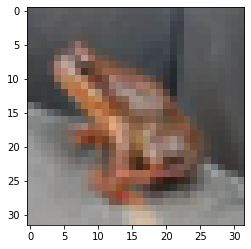

In [35]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())
plt.imshow(np.transpose(images[0], (1, 2, 0)))
plt.show()

In [49]:
class CNNDropOut(nn.Module):
  def __init__(self):
    super().__init__()
    self.features = torch.nn.Sequential(
        torch.nn.Conv2d(3, 10, 3), # (N, 3, 32, 32) -> (N, 10, 30, 30)
        torch.nn.ReLU(),
        torch.nn.Conv2d(10, 8, 3), # (N, 10, 30, 30) -> (N, 8, 28, 28)
        nn.AvgPool2d(2, stride=2) # (N, 8, 28, 28) -> (N, 8, 14, 14)
    )
    self.classifier = torch.nn.Sequential(
        nn.Linear(1568, 25), # (N, 1568) -> (N, 25)
        nn.Dropout(0.8),
        nn.ReLU(),
        nn.Linear(25,10), # (N, 25) -> (N, 10)
        nn.Dropout(0.8),
        nn.ReLU()
    )

  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

In [50]:
model_dropout = CNNDropOut()

In [51]:
# opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [52]:
max_epochs = 2

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
      input, label = data
      pred_dropout = model_dropout(input)
      loss_dropout = loss_fn(pred_dropout, label)
      opt_dropout.zero_grad()
      loss_dropout.backward()
      opt_dropout.step()
    
    # pred = model(X_train) # look at the entire data in a single shot
    # loss = loss_fn(pred, Y_train)
    # opt.zero_grad()
    # loss.backward()
    # opt.step()
    # if epoch % 50 == 0:
        
    #     model.eval()
    #     model_dropout.eval()
        
    #     test_pred = model(X_test)
    #     test_loss = loss_fn(test_pred, Y_test)
        
    #     test_pred_dropout = model_dropout(X_test)
    #     test_loss_dropout = loss_fn(test_pred_dropout, Y_test)
        
    #     plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
    #     plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
    #     plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
    #     plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3,  label='dropout')
        
    #     plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
        
    #     plt.legend()

    #     model.train()
    #     model_dropout.train()
        
    #     plt.pause(0.05)